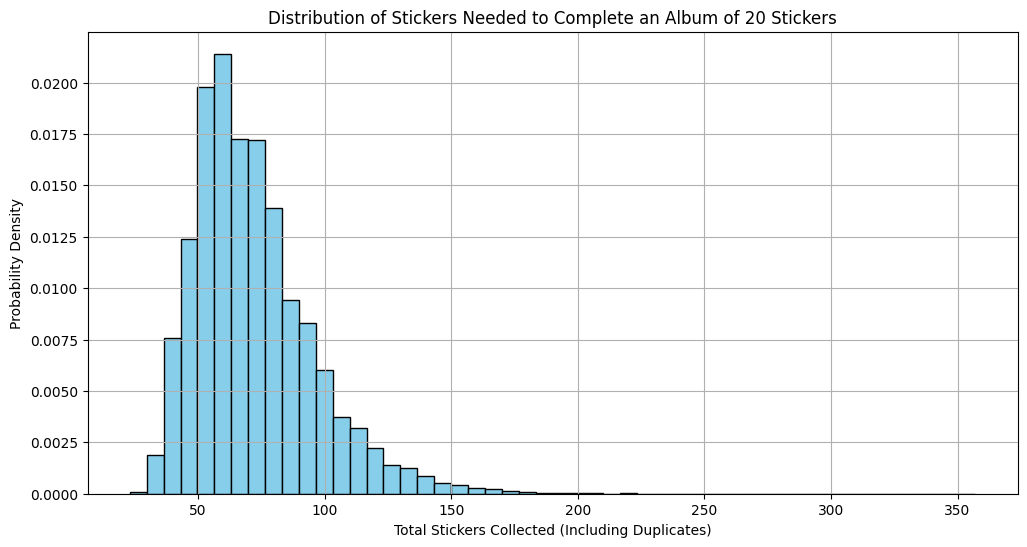

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def coupon_collector_simulation(N, simulations=100000):
    results = []
    for _ in range(simulations):
        stickers_collected = set()
        count = 0
        while len(stickers_collected) < N:
            new_sticker = np.random.randint(1, N+1)
            stickers_collected.add(new_sticker)
            count += 1
        results.append(count)
    return results

# Choose the number of stickers you want as N = number
N = 20
simulation_results = coupon_collector_simulation(N, simulations=100000)

# Plot the distribution
plt.figure(figsize=(12,6))
plt.hist(simulation_results, bins=50, color='skyblue', edgecolor='black', density=True)
plt.title(f'Distribution of Stickers Needed to Complete an Album of {N} Stickers')
plt.xlabel('Total Stickers Collected (Including Duplicates)')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

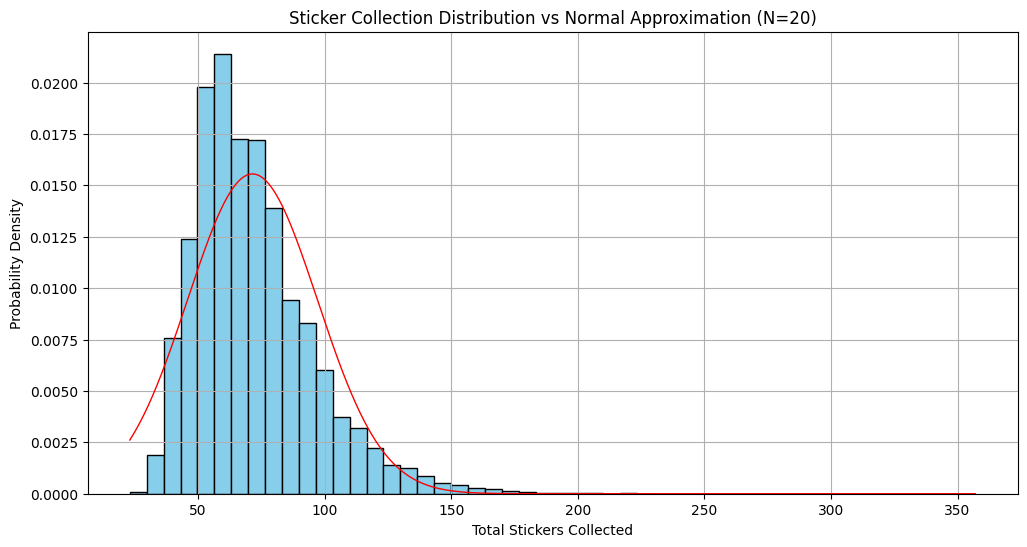

In [ ]:
# Normal approximation (for comparison)
from scipy.stats import norm

mean = N * (np.log(N) + 0.5772)
std = np.sqrt(N**2 * (np.pi**2 / 6))

plt.figure(figsize=(12,6))
x = np.linspace(min(simulation_results), max(simulation_results), 100000)
plt.hist(simulation_results, bins=50, color='skyblue', edgecolor='black', density=True)
plt.plot(x, norm.pdf(x, mean, std), 'r', linewidth=1)

plt.title(f'Sticker Collection Distribution vs Normal Approximation (N={N})')
plt.xlabel('Total Stickers Collected')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

In [ ]:
# Calculate percentiles and mean
percentiles = np.percentile(simulation_results, [10, 25, 50, 75, 90])
mean_sim = sum(simulation_results)/len(simulation_results)

print("Percentiles:")
for p, val in zip([10, 25, 50, 75, 90], percentiles):
    print(f"{p}th percentile: {val:.2f}")
print(f"Mean: {mean_sim:.2f}")

Percentiles:
10th percentile: 46.00
25th percentile: 55.00
50th percentile: 67.00
75th percentile: 84.00
90th percentile: 103.00
Mean: 71.95


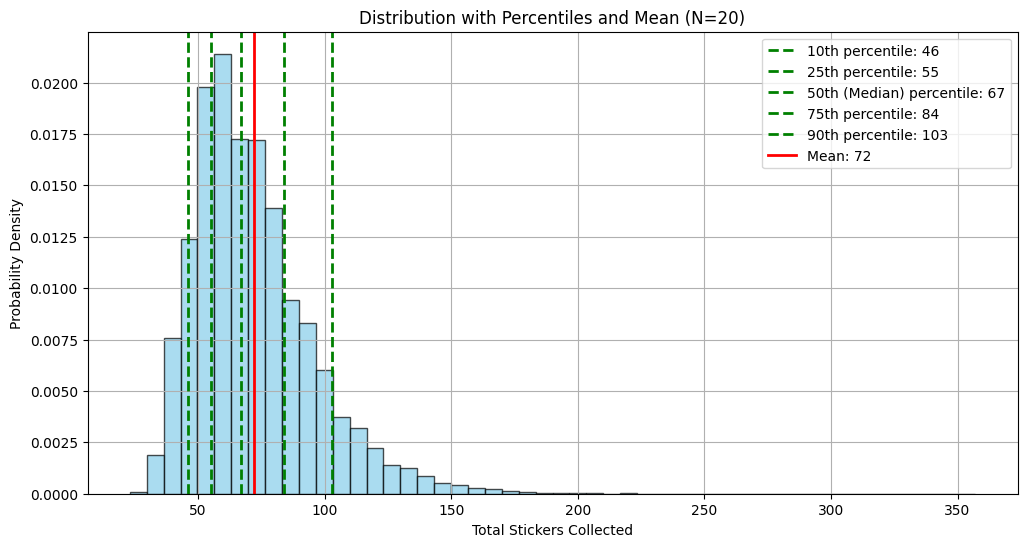

In [ ]:
# Visualization
plt.figure(figsize=(12, 6))

# Plot histogram (density plot)
plt.hist(simulation_results, bins=50, density=True, color='skyblue', edgecolor='black', alpha=0.7)


for perc, val in zip(['10th', '25th', '50th (Median)', '75th', '90th'], percentiles):
    plt.axvline(val, linestyle='--', color='green', linewidth=2, label=f'{perc} percentile: {val:.0f}')

# Mean line
plt.axvline(mean_sim, color='red', linestyle='-', linewidth=2, label=f'Mean: {mean_sim:.0f}')

# Labels and title
plt.xlabel('Total Stickers Collected')
plt.ylabel('Probability Density')
plt.title(f'Distribution with Percentiles and Mean (N={N})')
plt.legend()
plt.grid(True)
plt.show()